### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\hp\Olist_Project\02 Data\Prepared Data'

In [11]:
# Import the dataset

df = pd.read_csv(os.path.join(path, 'merged_all.csv'))

### 2. Data cleaning

In [15]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_grms', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english'],
      dtype='object')

In [17]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [19]:
columns = ['order_item_id',
           'price', 'freight_value',
           'payment_sequential', 'payment_installments',
           'payment_value', 'review_score',
           'product_photos_qty',
           ]

In [1]:
# Create a subset

df_numeric_rec = df[columns]

NameError: name 'df' is not defined

In [23]:
df_numeric_rec.head()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_photos_qty
0,1,124.99,21.88,1,2,146.87,4,1
1,1,124.99,21.88,1,2,146.87,4,1
2,1,124.99,21.88,1,2,146.87,4,1
3,1,124.99,21.88,1,2,146.87,4,1
4,1,124.99,21.88,1,2,146.87,4,1


### 3. Data prep for regression analysis 

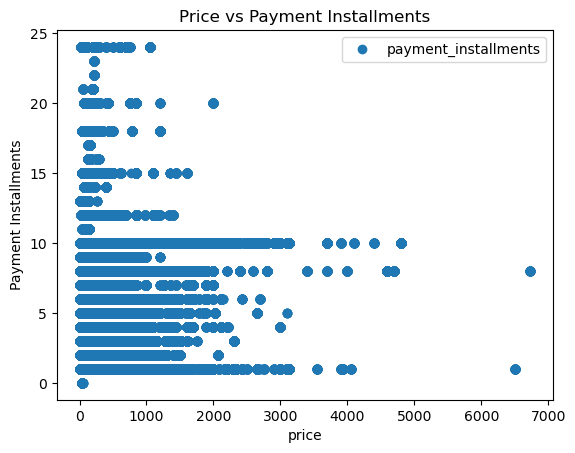

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='payment_installments',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Payment Installments')  
plt.xlabel('price')  
plt.ylabel('Payment Installments')  
plt.show()

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price'].values.reshape(-1,1)
y = df['payment_installments'].values.reshape(-1,1)

In [47]:
X

array([[124.99],
       [124.99],
       [124.99],
       ...,
       [ 13.99],
       [ 13.99],
       [ 13.99]])

In [49]:
y

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [51]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [55]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

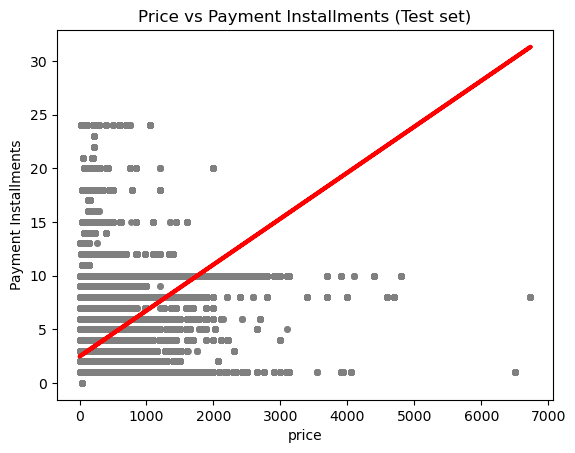

In [61]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Payment Installments (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('Payment Installments')
plot_test.show()

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [65]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00428395]]
Mean squared error:  7.377968118585095
R2 score:  0.0760029370242239


In [67]:
y_predicted

array([[3.95346134],
       [2.92617073],
       [2.61768367],
       ...,
       [2.84049178],
       [2.63781822],
       [2.84434733]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8,3.953461
1,3,2.926171
2,8,2.617684
3,6,2.502017
4,6,2.714330
5,1,2.883331
6,3,2.771520
7,5,4.472633
8,3,2.507201
9,3,6.481847


##### Compare how the regression fits the training set

In [72]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [76]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00428395]]
Mean squared error:  7.376968110481627
R2 score:  0.07590810367309564


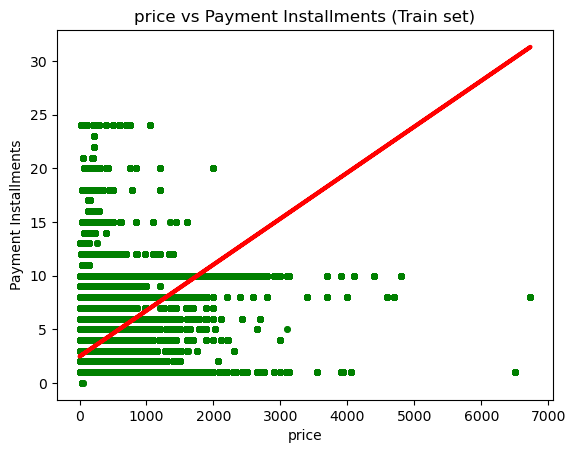

In [78]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('price vs Payment Installments (Train set)')
plot_test.xlabel('price')
plot_test.ylabel('Payment Installments')
plot_test.show()

##### Slope indicates that for every 1-unit increase in the predictor variable, the response variable increases by only 0.00428.
##### Here, the MSE is 7.38, which could indicate some prediction error.
##### An R² of 0.076 means the model only explains about 7.6% of the variance, 
##### suggesting that it isn't very effective at explaining the relationship between the variables.